Impoprting Libraries

In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

Loading The Dataset

In [36]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv')
dataset.head

<bound method NDFrame.head of      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise

dataset shap and columns

In [37]:
dataset.shape
dataset.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

Data Summary

In [38]:
dataset.info

<bound method DataFrame.info of      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exerci

checking for missing data

In [39]:
dataset.isnull().sum().sort_values(ascending=False)

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

checking for duplicate data

In [40]:
dataset.duplicated().sum()

0

separating independent and dependent variable

In [41]:
X=dataset.drop('Heart Disease',axis=1)
y=dataset['Heart Disease']

In [42]:
print(X.shape)
print(y.shape)

(270, 13)
(270,)


spliting dataset into train and test set

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

data preprocessing


feature scaling

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model call and training

In [45]:
model = LogisticRegression()
model.fit(X_train,y_train)

d:\ana\anaconda\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\ana\anaconda\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

model prediction

In [46]:
y_pred=model.predict(X_test)

model evaluatioon

In [47]:
print("Accuracy_score:\n",accuracy_score(y_test,y_pred))
print("Precision:\n",precision_score(y_test, y_pred,pos_label='Presence'))
print("Recall:\n",recall_score(y_test,y_pred,pos_label='Presence'))
print("F1_score:\n",f1_score(y_test,y_pred,pos_label='Presence'))
print("Classification_report:\n",classification_report(y_test,y_pred))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy_score:
 0.9074074074074074
Precision:
 0.9
Recall:
 0.8571428571428571
F1_score:
 0.8780487804878048
Classification_report:
               precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

Confusion_matrix:
 [[31  2]
 [ 3 18]]


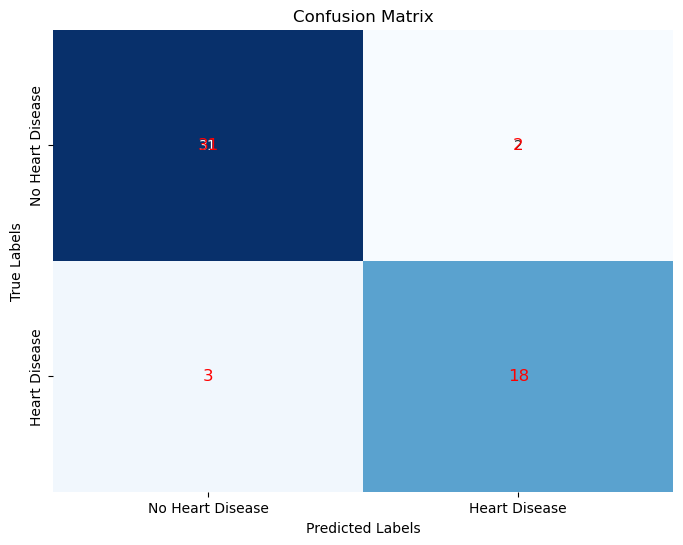

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'], cbar=False)

# Manually add values inside the heatmap
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, str(confusion_matrix(y_test, y_pred)[i, j]), ha='center', va='center', fontsize=12, color='red')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
coefficients = model.coef_[0]
feature_names = X.columns

In [50]:
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

In [51]:
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False).drop('Absolute_Coefficient', axis=1)

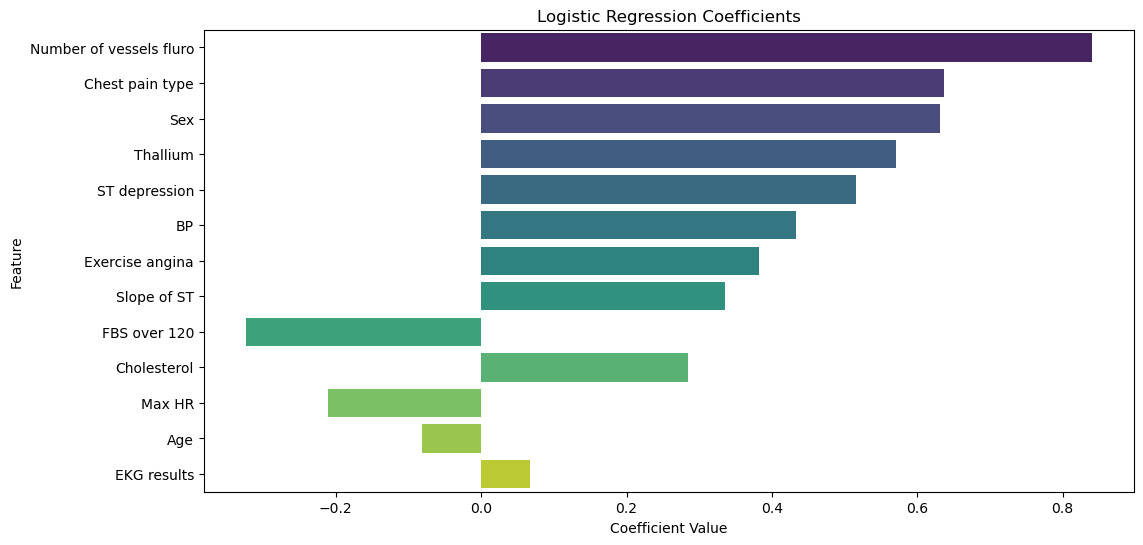

In [58]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()